In [1]:
###### %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

# convolutional autoencoder in keras

import os
#os.environ["KERAS_BACKEND"] = "tensorflow"

from __future__ import print_function
from keras.models import Model
from keras.layers import *
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import backend as K

import matplotlib.pyplot as plt
# %matplotlib inline

from keras.datasets import mnist 

from scipy.ndimage.filters import gaussian_laplace
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nilearn
from nilearn import plotting

import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

import brain_functions as bf

#from PIL import Image

K.set_learning_phase(1)

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
### Create input

size=21

train_path = "C:/Users/A2/Documents/CDS/MA/MA/test_pics/"
test_path = "C:/Users/A2/Documents/CDS/MA/MA/test_pics/"

#train_path = "/home/hoffmann/MRI/training_data/"
#test_path = "/home/hoffmann/MRI/test_data/"

#bf.show_skull(test_path)

train_batches, train_allpos, train_vip=bf.loadbatches(test_path, size)
test_batches, test_allpos, test_vip=bf.loadbatches(test_path, size)

(87, 21, 21, 21)
(87, 21, 21, 21)


In [3]:
maxfil=32
bs_z=2
eps=2
    
name='testspeicher'
    
#bf.pretrain(train_batches,test_batches,name,size,maxfil,bs_z,eps)

In [4]:
#autoencoder, encoder = bf.unrollAndTrain(train_batches,test_batches,name,size,maxfil,bs_z,eps)
autoencoder, encoder = bf.loadAutoencoder(name,size,maxfil)

In [5]:
#encoded_imgs = encoder.predict(test_batches)
#print(np.shape(test_batches))
#print(np.shape(encoded_imgs))

#bf.show_batch(test_batches, size, autoencoder.predict(test_batches))
#bf.show_encoded(test_batches, size, encoded_imgs, 1)

In [6]:
#out, out_fil = bf.getMaxGrads(test_batches, name, size, maxfil, 't4c1')

#print(np.shape(out))
#print(np.shape(out_fil))

#bf.show_batch(test_batches, size, out)
#bf.show_batch(test_batches, size, out_fil)

(8640, 21, 21, 21)
(5, 252, 252, 252)


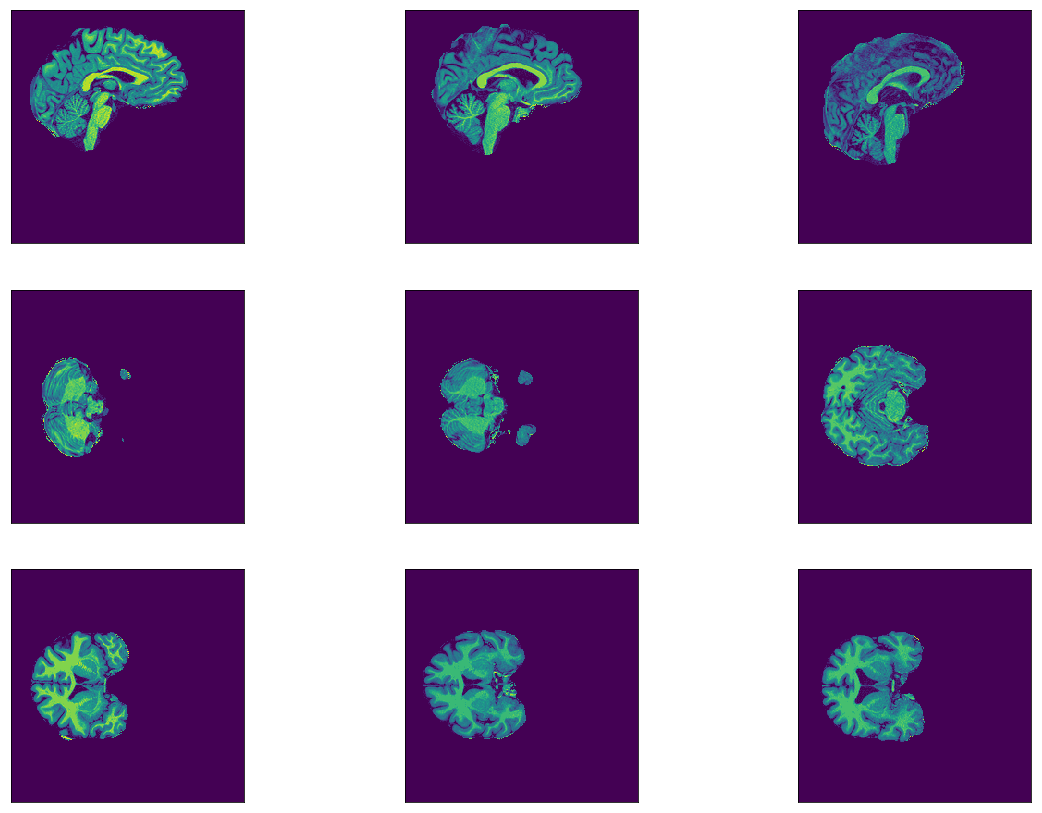

(5, 256, 256, 256)


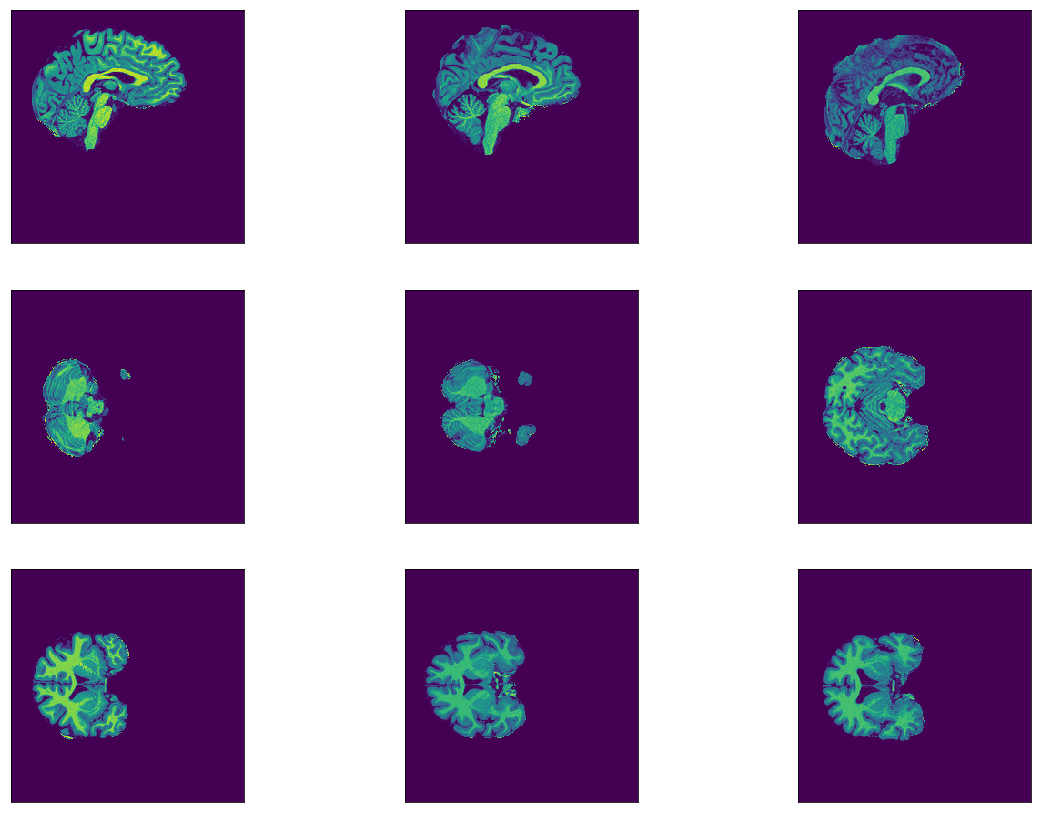

In [7]:
### set patches back together

control_batches, control_allpos, control_vip=bf.loadbatches(test_path, size, False)

cpics = bf.recombine(control_batches, control_allpos)

print(np.shape(cpics))
bf.show_whole(cpics)

comp=bf.load_whole(test_path)
    
print(np.shape(comp))
bf.show_whole(comp)




In [8]:
import itk

reader1 = itk.ImageFileReader.IUC2.New(FileName=train_path+"/sub-032367_ses-01_acq-mp2rage_brain.nii.gz")
image1  = reader1.GetOutput()

ModuleNotFoundError: No module named 'itk'

In [ ]:
init=0.000001

mean_act=[]
mean_act.append(np.full((maxfil),init))
mean_act.append(np.full(1,init))
mean_act.append(np.full((int(maxfil/2)),init))
mean_act.append(np.full((int(maxfil/4)),init))
mean_act.append(np.full((int(maxfil/4)),init))
mean_act.append(np.full((int(maxfil/2)),init))
mean_act.append(np.full((maxfil),init))
mean_act.append(np.full(1,init))

i = -1
j = -1

from keras import regularizers

def calc_mean(a_tensor):
    global i
    global j
    global mean_act
    
    if j == 1:
        j=-1
    
    j+=1
    i+=1
    
    ### x is 21x21x21xnof tensor -> combine to nof tensor (mean of all 21x21x21 activations?)
    
    #x=K.eval(a_tensor)
      
    for k in range(K.int_shape(a_tensor)[-1]):
        mean_act[j][k]=mean_act[j][k]*i/(i+1)+K.mean(a_tensor[:,:,:,:,k])
    return mean_act[j]

def kl_divergence(p, p_hat):
    return (p * K.log(p/p_hat)) + ((1-p) * K.log((1-p)/(1-p_hat)))

def kl_reg(x):
    beta=0.1
    p=0.001
    p_hat=calc_mean(x)
    res=0
    for i in range(len(K.int_shape(p_hat))):
        res+=kl_divergence(p,p_hat[i])
    
    return beta * res / K.int_shape(p_hat)

test2_c1=Conv3D(maxfil, (3, 3, 3), activation='sigmoid', padding='same', name='t1c1', activity_regularizer=kl_reg)(input_img)
test2_decoded=Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same', name='t1tc1', activity_regularizer=kl_reg)(test2_c1)
    
test2_autoencoder = Model(input_img, test2_decoded)
test2_autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

test2_autoencoder.fit(train_batches, train_batches, 
                     validation_data=(test_batches, test_batches),
                     epochs=2, batch_size=bs_z, verbose=1)

In [ ]:
print(mean_act[0])

In [ ]:
init=0.000001

mean_act=[]
mean_act.append(np.full((maxfil),init))
mean_act.append(np.full(1,init))
mean_act.append(np.full((int(maxfil/2)),init))
mean_act.append(np.full((int(maxfil/4)),init))
mean_act.append(np.full((int(maxfil/4)),init))
mean_act.append(np.full((int(maxfil/2)),init))
mean_act.append(np.full((maxfil),init))
mean_act.append(np.full(1,init))

d

i = -1
j = -1

from keras import regularizers

def calc_mean(a_tensor):
    global i
    global j
    global mean_act
    
    if j == 1:
        j=-1
    
    j+=1
    i+=1
    
    ### x is 21x21x21xnof tensor -> combine to nof tensor (mean of all 21x21x21 activations?)
    
    #x=K.eval(a_tensor)
    
    x=K.mean(a_tensor, axis=[1,2,3])
    
    global d
    d=K.int_shape(x)
    
    mean_act[j]=mean_act[j]*i/(i+1)+x
    return mean_act[j]

def kl_divergence(p, p_hat):
    return (p * np.log(p/p_hat)) + ((1-p) * np.log((1-p)/(1-p_hat)))

def kl_reg(x):
    beta=0.1
    p=0.001
    p_hat=calc_mean(x)
    res=0
    for i in range(len(p_hat)):
        res+=kl_divergence(p,p_hat[i])
    print(beta * res / len(p_hat))
    
    return beta * res / len(p_hat)

test2_c1=Conv3D(maxfil, (3, 3, 3), activation='sigmoid', padding='same', name='t1c1', activity_regularizer=kl_reg)(input_img)
test2_decoded=Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same', name='t1tc1', activity_regularizer=kl_reg)(test2_c1)
    
test2_autoencoder = Model(input_img, test2_decoded)
test2_autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

test2_autoencoder.fit(train_batches, train_batches, 
                     validation_data=(test_batches, test_batches),
                     epochs=2, batch_size=bs_z, verbose=1)


In [ ]:
print(d)

In [ ]:
def activeKL(model):
    
    add_loss=0
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    
    for l in layer_dict:
        print(l.name)
        nof=l.output_shape[4]
        for i in nof:
            q_hat=K.mean(l.output[:, :, :, :, i])
            loss+=kl_divergence(0.001,q_hat)
    
    return loss*0.1

def own_mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

def own_loss(y_true, y_pred):
    return own_mean_squared_error(y_true, y_pred)+activeKL

def kl_divergence(p, p_hat):
    return (p * K.log(p / p_hat)) + ((1-p) * K.log((1-p) / (1-p_hat)))

test2_c1=Conv3D(maxfil, (3, 3, 3), activation='sigmoid', padding='same', name='t1c1', activity_regularizer=l1_reg)(input_img)
test2_decoded=Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same', name='t1tc1', activity_regularizer=l1_reg)(test2_c1)
    
test2_autoencoder = Model(input_img, test2_decoded)
test2_autoencoder.compile(optimizer='adadelta', loss=own_loss)

test2_autoencoder.fit(train_batches, train_batches, 
                     validation_data=(test_batches, test_batches),
                     epochs=2, batch_size=bs_z, verbose=1)


In [ ]:
from keras.regularizers import Regularizer

def kl_divergence(p, p_hat):
    return (p * K.log(p / p_hat)) + ((1-p) * K.log((1-p) / (1-p_hat)))

class SparseActivityRegularizer(Regularizer):
    sparsityBeta = None

    def __init__(self, l1=0., l2=0., p=0.001, sparsityBeta=0.1):
        self.p = p
        self.sparsityBeta = sparsityBeta

    def set_layer(self, layer):
        self.layer = layer

    def __call__(self, loss):
        #p_hat needs to be the average activation of the units in the hidden layer.      
        p_hat = K.sum(K.mean(self.layer.get_output(True) , axis=0))

        loss += self.sparsityBeta * kl_divergence(self.p, p_hat)
        return loss

    def get_config(self):
        return {"name": self.__class__.__name__,"p": self.l1}

test_c1=Conv3D(maxfil, (3, 3, 3), activation='sigmoid', padding='same', name='t1c1', activity_regularizer=SparseActivityRegularizer(p=0.001, sparsityBeta=0.1))(input_img)
test_decoded=Conv3D(1, (3, 3, 3), activation='sigmoid', padding='same', name='t1tc1', activity_regularizer=SparseActivityRegularizer(p=0.001, sparsityBeta=0.1))(test_c1)
    
test_autoencoder = Model(input_img, test_decoded)
test_autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

test_autoencoder.fit(train_batches, train_batches, 
                     validation_data=(test_batches, test_batches),
                     epochs=eps, batch_size=bs_z, verbose=1)
    
'''
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')

autoencoder = Sequential()
encoder = containers.Sequential([Dense(250, input_dim=576, init='glorot_uniform', activation='tanh', 
    activity_regularizer=SparseActivityRegularizer(p=-0.9, sparsityBeta=0.1))])

decoder = containers.Sequential([Dense(576, input_dim=250)])
autoencoder.add(AutoEncoder(encoder=encoder, decoder=decoder, output_reconstruction=True))
autoencoder.layers[0].build()
autoencoder.compile(loss='mse', optimizer=SGD(lr=0.001, momentum=0.9, nesterov=True))
loss = autoencoder.fit(X_train_tmp, X_train_tmp, nb_epoch=200, batch_size=800, verbose=True, show_accuracy=True, validation_split = 0.3)
autoencoder.save_weights('SparseAutoEncoder.h5',overwrite = True)
result = autoencoder.predict(X_test)
'''